### EDA

In [357]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


df = sns.load_dataset("mpg")

In [358]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [359]:
# Excersise a)
df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [361]:
# Excersise b)
df_hp = df["horsepower"]

df_hp.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [362]:
df_weight = df["weight"]

df_weight.describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

In [363]:
df_dis = df["displacement"]

df_dis.describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

Text(0.5, 1.0, 'horsepower vs weight')

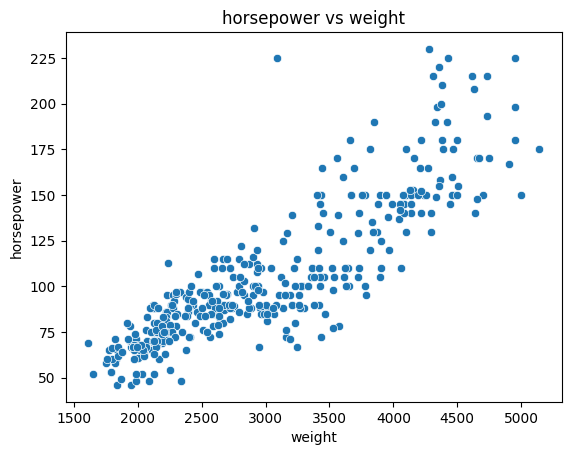

In [364]:
# Excersise c)
sns.scatterplot(data=df, x="weight", y="horsepower")
plt.title("horsepower vs weight")

Text(0.5, 1.0, 'acceleration vs weight')

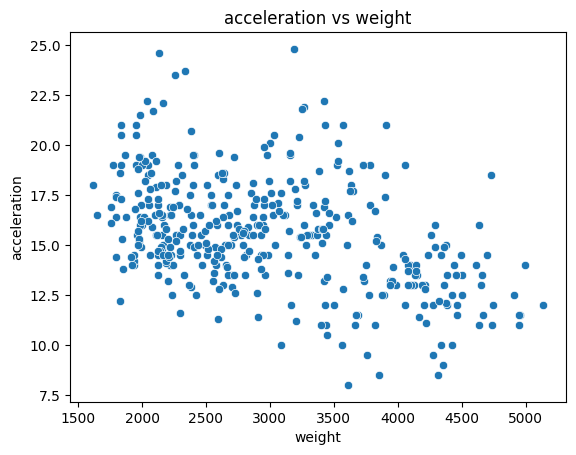

In [365]:
sns.scatterplot(data=df, x="weight", y="acceleration")
plt.title("acceleration vs weight")

Text(0.5, 1.0, 'cylinders vs weight')

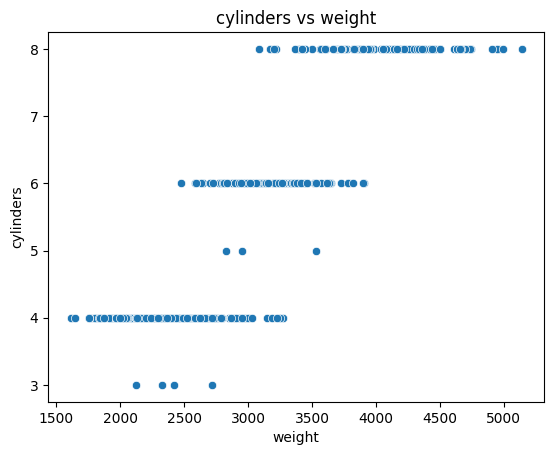

In [366]:
sns.scatterplot(data=df, x="weight", y="cylinders")
plt.title("cylinders vs weight")

Text(0.5, 1.0, 'mpg vs weight')

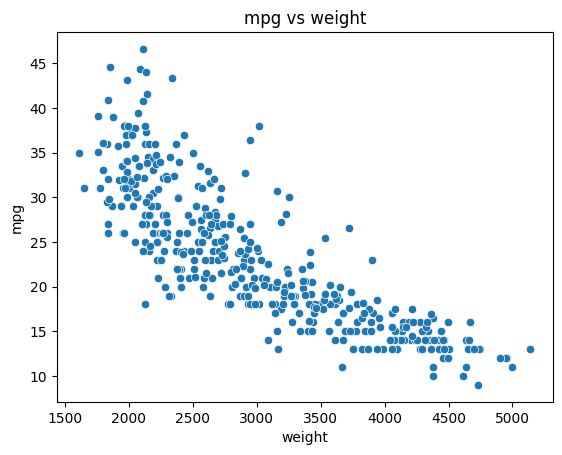

In [367]:
sns.scatterplot(data=df, x="weight", y="mpg")
plt.title("mpg vs weight")

Text(0.5, 1.0, 'mpg vs displacement')

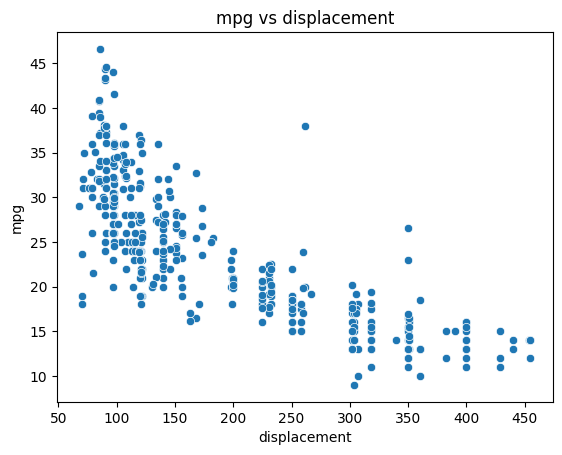

In [368]:
sns.scatterplot(data=df, x="displacement", y="mpg")
plt.title("mpg vs displacement")

In [369]:
df = df.drop(columns=["model_year", "name", "origin"])
df = df.fillna(0)

### Train|test split + Excersise d) på 1

In [370]:
from sklearn.preprocessing import StandardScaler

X, y = df.drop("mpg", axis="columns"), df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Print the shapes of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 5), (80, 5), (318,), (80,))

### Function for evalutation

In [371]:
model_OLS = LinearRegression()
model_OLS.fit(X_train, y_train)
print(X.columns)
print(f"Parameters {model_OLS.coef_}")
print(f"Intercept {model_OLS.intercept_}")

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')
Parameters [-0.12985846 -0.00737864 -0.03659383 -0.00533859 -0.01910305]
Intercept 45.598689891741344


In [372]:
from sklearn.preprocessing import PolynomialFeatures

def evaluation(y_test, y_pred):

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{mae  = } \n{mse  = } \n{rmse = }")

y_pred_OLS = model_OLS.predict(X_test)
metrics = evaluation(y_test, y_pred_OLS)

mae  = 3.1444059807895988 
mse  = 15.035702719386695 
rmse = 3.877589808036262


In [373]:
model_OLS = LinearRegression()
model_OLS.fit(X_train, y_train)

LinearRegression()

### Compare models

In [374]:
model_OLS = LinearRegression()
model_OLS.fit(scaled_X_train, y_train) 
unscaled_X_test = scaler.inverse_transform(scaled_X_test)
y_pred_OLS_scaled = model_OLS.predict(scaled_X_test)
metrics_OLS_scaled = evaluation(y_test, y_pred_OLS_scaled)

mae  = 3.1444059807895983 
mse  = 15.035702719386688 
rmse = 3.877589808036261


In [375]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor(max_iter=10000, random_state=42)
model_SGD.fit(scaled_X_train, y_train)
y_pred_SGD = model_SGD.predict(scaled_X_test)
metrics_SGD = evaluation(y_test, y_pred_SGD)

mae  = 3.1391954717757935 
mse  = 15.115833593717252 
rmse = 3.887908640093958


In [376]:
polynomial_instance = PolynomialFeatures(1, include_bias=False)
poly_feature = polynomial_instance.fit_transform(X)
X_train , X_test, y_train, y_test = train_test_split(poly_feature,  y, test_size=0.2, random_state=42)

poly_1_model = LinearRegression()
poly_1_model.fit(X_train, y_train)
poly_1_y_pred = poly_1_model.predict(X_test)
poly_1_metrics = evaluation(y_test, poly_1_y_pred)

mae  = 3.144405980789597 
mse  = 15.035702719386686 
rmse = 3.877589808036261


In [377]:
model_polynomial = PolynomialFeatures(2, include_bias=False)
poly_feature = model_polynomial.fit_transform(X)
X_train , X_test, y_train, y_test = train_test_split(poly_feature,  y, test_size=0.2, random_state=42)

poly_2_model = LinearRegression()
poly_2_model.fit(X_train, y_train)
poly_2_y_pred = poly_2_model.predict(X_test)
poly_2_metrics = evaluation(y_test, poly_2_y_pred)

mae  = 2.7692176962264994 
mse  = 14.130568527165781 
rmse = 3.7590648474275863


In [378]:
model_polynomial = PolynomialFeatures(3, include_bias=False)
poly_feature = model_polynomial.fit_transform(X)
X_train , X_test, y_train, y_test = train_test_split(poly_feature,  y, test_size=0.2, random_state=42)

poly_3_model = LinearRegression()
poly_3_model.fit(X_train, y_train)
poly_3_y_pred = poly_3_model.predict(X_test)
poly_3_metrics = evaluation(y_test, poly_3_y_pred)

mae  = 3.4440378944837553 
mse  = 40.33777136723165 
rmse = 6.351202356029263


In [379]:
metrics = ["mae", "mse", "rmse"]

new_df = pd.DataFrame(
         {
            "Linear regr. SVD": metrics,
            "Linear regr. SVD Scaled": y_pred_OLS_scaled,
            "Linear regr. SGD": metrics_SGD,
            "Polynom. regr. deg 1": poly_1_model,
            "Polynom. regr. deg 2": poly_2_model,
            "Polynom. regr. deg 3": poly_3_model,
         }
         , index = ["mae", "mae", "rmse"]
)


new_df



ValueError: Length of values (80) does not match length of index (3)